In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("white.csv", sep=';')

X = df.drop("quality", axis=1)
y = df["quality"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

def evaluate_svm(kernel_type):
    model = SVC(kernel=kernel_type, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"SVM with {kernel_type} kernel")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_svm('rbf')

evaluate_svm('poly')


SVM with rbf kernel
Accuracy: 0.628125
Precision: 0.6117222764269392
Recall: 0.628125
F1 Score: 0.6053464705720344

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.76      0.70       136
           6       0.58      0.66      0.62       128
           7       0.82      0.35      0.49        40
           8       0.00      0.00      0.00         3

    accuracy                           0.63       320
   macro avg       0.34      0.29      0.30       320
weighted avg       0.61      0.63      0.61       320

SVM with poly kernel
Accuracy: 0.60625
Precision: 0.5923633832231118
Recall: 0.60625
F1 Score: 0.5846716295122099

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



✅ ANN Test Accuracy: 0.9474, Loss: 0.1035
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Classification Report (ANN):
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.99      0.93      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



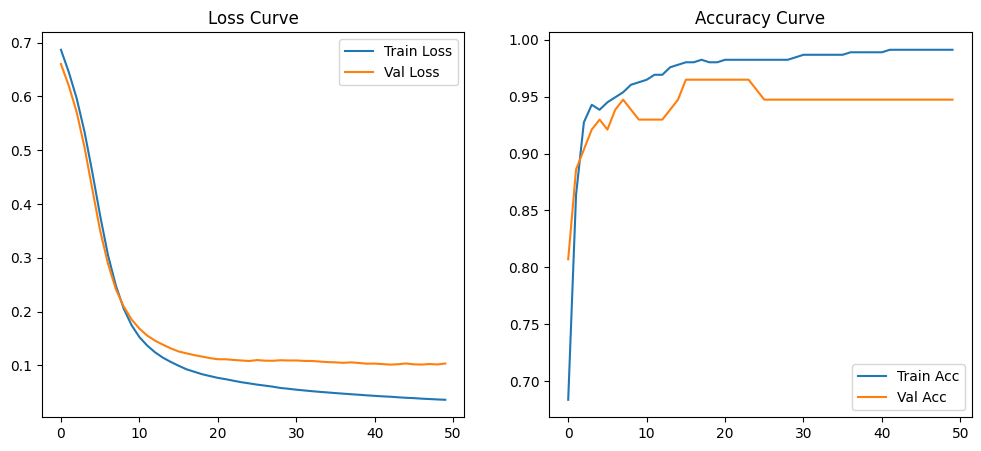


✅ MLP Test Accuracy: 0.956140350877193

Classification Report (MLP):
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


📊 Final Comparison:
ANN Accuracy: 0.9474
MLP Accuracy: 0.9561


In [12]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())

print(df.describe())

print("Missing values:\n", df.isnull().sum())

# ii. Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))


y_ann = to_categorical(df['target'])
y = df['target']

from sklearn.model_selection import train_test_split

X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(
    X_scaled, y_ann, test_size=0.2, random_state=42, stratify=y)

X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


ann_model = Sequential()
ann_model.add(Dense(16, activation='relu', input_shape=(X_scaled.shape[1],)))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(2, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = ann_model.fit(
    X_train_ann, y_train_ann, epochs=50, batch_size=32,
    validation_data=(X_test_ann, y_test_ann), verbose=0)

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=500, random_state=42)

mlp.fit(X_train_mlp, y_train_mlp)

from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

loss, acc = ann_model.evaluate(X_test_ann, y_test_ann, verbose=0)
print(f"\n✅ ANN Test Accuracy: {acc:.4f}, Loss: {loss:.4f}")

y_pred_ann = ann_model.predict(X_test_ann)
y_pred_ann_labels = np.argmax(y_pred_ann, axis=1)
y_true_ann_labels = np.argmax(y_test_ann, axis=1)

print("\nClassification Report (ANN):\n", classification_report(y_true_ann_labels, y_pred_ann_labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

y_pred_mlp = mlp.predict(X_test_mlp)
print("\n✅ MLP Test Accuracy:", accuracy_score(y_test_mlp, y_pred_mlp))
print("\nClassification Report (MLP):\n", classification_report(y_test_mlp, y_pred_mlp))

print("\n📊 Final Comparison:")
print(f"ANN Accuracy: {acc:.4f}")
print(f"MLP Accuracy: {accuracy_score(y_test_mlp, y_pred_mlp):.4f}")
